In [4]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import xarray as xr
from sizedist_utils import compute_Nx_ebas_cleaned
import matplotlib.pyplot as plt

In [6]:
pwd

'/home/jovyan/Tjaernoe2022-group1_2nd/notebooks/Ingvild'

## Loading data

In [197]:
data1 = xr.open_dataset('/home/jovyan/Data/zeppelin-cloud-aerosol-1_part1.nc4')
data2 = xr.open_dataset('/home/jovyan/Data/zeppelin-cloud-aerosol-1_part2.nc4')

In [198]:
data2

<xarray.Dataset>
Dimensions:                             (time: 31061, aerosol_diameters: 57,
                                         boundaries: 2)
Coordinates:
  * time                                (time) datetime64[ns] 2015-11-27T08:2...
  * aerosol_diameters                   (aerosol_diameters) float64 5e-09 ......
  * boundaries                          (boundaries) object 'left' 'right'
Data variables:
    aerosol_particle_size_distribution  (time, aerosol_diameters) float64 ...
    time_bounds                         (time, boundaries) datetime64[ns] ...
Attributes:
    title:       Cloud and aerosol measurements from Zeppelin Observatory, Sv...
    authors:     Linn Karlsson, Paul Zieger, Radovan Krejci, Makoto Koike, Ke...
    contact:     Paul Zieger, paul.zieger@aces.su.se
    site:        Zeppelin Observatory, Svalbard, 78.9N 11.9E
    comment:     This is one of two files that together contain all data that...
    start_date:  2015-11-27
    end_date:    2018-02-04
    version:     1.0
    history:     2021-05-06 created

In [196]:
data2

<xarray.Dataset>
Dimensions:                             (time: 31061, aerosol_diameters: 57,
                                         boundaries: 2, limit: 2)
Coordinates:
  * time                                (time) datetime64[ns] 2015-11-27T08:2...
  * aerosol_diameters                   (aerosol_diameters) float64 5e-09 ......
  * boundaries                          (boundaries) object 'left' 'right'
  * limit                               (limit) object 'bottom' 'top'
Data variables:
    aerosol_particle_size_distribution  (time, aerosol_diameters) float64 nan...
    time_bounds                         (time, boundaries) datetime64[ns] 201...
    log10D                              (aerosol_diameters) float64 -8.301 .....
    bottom                              (aerosol_diameters) float64 4.564e-09...
    top                                 (aerosol_diameters) float64 5.477e-09...
    diam_lims                           (limit, aerosol_diameters) float64 4....
    dlog10D                             (aerosol_diameters) float64 0.07918 ....
    dN                                  (time, aerosol_diameters) float64 nan...
Attributes:
    title:       Cloud and aerosol measurements from Zeppelin Observatory, Sv...
    authors:     Linn Karlsson, Paul Zieger, Radovan Krejci, Makoto Koike, Ke...
    contact:     Paul Zieger, paul.zieger@aces.su.se
    site:        Zeppelin Observatory, Svalbard, 78.9N 11.9E
    comment:     This is one of two files that together contain all data that...
    start_date:  2015-11-27
    end_date:    2018-02-04
    version:     1.0
    history:     2021-05-06 created

## Masking data with cloud mask

In [151]:
data1_cl_mask=data1.where(data1['cloud_flag']=='yes')
data1_no_cl = data1.where(data1['cloud_flag']=='no')

In [78]:
data1_no_cl

<xarray.Dataset>
Dimensions:                                        (time: 83755,
                                                    aerosol_diameters: 30,
                                                    cloud_diameters: 43,
                                                    boundaries: 2,
                                                    target_classification: 11)
Coordinates:
  * time                                           (time) datetime64[ns] 2015...
  * aerosol_diameters                              (aerosol_diameters) float64 ...
  * cloud_diameters                                (cloud_diameters) float64 ...
  * boundaries                                     (boundaries) object 'left'...
  * target_classification                          (target_classification) object ...
Data variables: (12/17)
    aerosol_particle_size_distribution             (time, aerosol_diameters) float64 ...
    total_aerosol_particle_concentration           (time) float64 nan ... 26.63
    cloud_flag                                     (time) object nan ... 'no'
    enrichment_factor                              (time) float64 nan ... 1.0
    transmission_efficiency_factor                 (time) float64 nan ... nan
    cluster                                        (time) float64 nan ... nan
    ...                                             ...
    temperature                                    (time) float64 nan ... -0....
    wind_direction                                 (time) float64 nan ... 152.2
    wind_speed                                     (time) float64 nan ... 12.14
    updraft_velocity                               (time) float64 nan ... 4.355
    time_bounds                                    (time, boundaries) datetime64[ns] ...
    normalised_target_classification               (time, target_classification) float64 ...
Attributes:
    title:       Cloud and aerosol measurements from Zeppelin Observatory, Sv...
    authors:     Linn Karlsson, Paul Zieger, Radovan Krejci, Makoto Koike, Ke...
    contact:     Paul Zieger, paul.zieger@aces.su.se
    site:        Zeppelin Observatory, Svalbard, 78.9N 11.9E
    comment:     This is one of two files that together contain all data that...
    start_date:  2015-11-27
    end_date:    2018-02-04
    version:     1.0
    history:     2021-05-06 created

# Calculating concentrations

In [12]:
Nx_cloud =compute_Nx_ebas_cleaned(data1_cl_mask,x=1e-9, var_diam = 'cloud_diameters', v_dNdlog10D='cloud_particle_size_distribution')

In [13]:
Nx_aero_tot=data1_cl_mask.total_aerosol_particle_concentration#/data1_cl_mask.transmission_efficiency_factor

In [14]:
data1_cl_mask['aerosol_particle_size_distribution_eff_fac'] = data1_cl_mask.aerosol_particle_size_distribution/data1_cl_mask.transmission_efficiency_factor

/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)
/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)


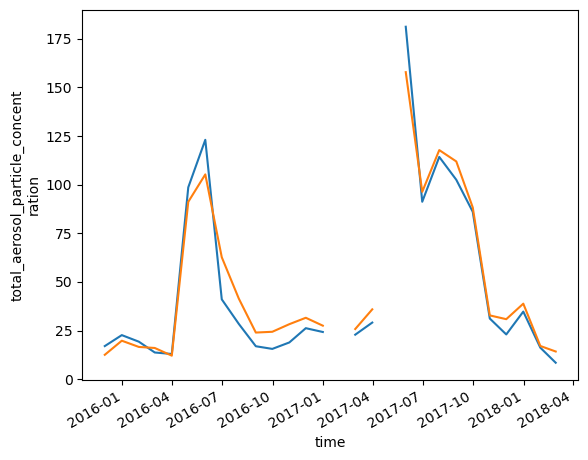

In [15]:
Nx_aero=compute_Nx_ebas_cleaned(data1_cl_mask,x=20e-9, var_diam = 'aerosol_diameters', v_dNdlog10D='aerosol_particle_size_distribution')
Nx_aero.resample(time='M').mean().plot()
data1_cl_mask['total_aerosol_particle_concentration'].resample(time='M').mean().plot()

/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)
/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)


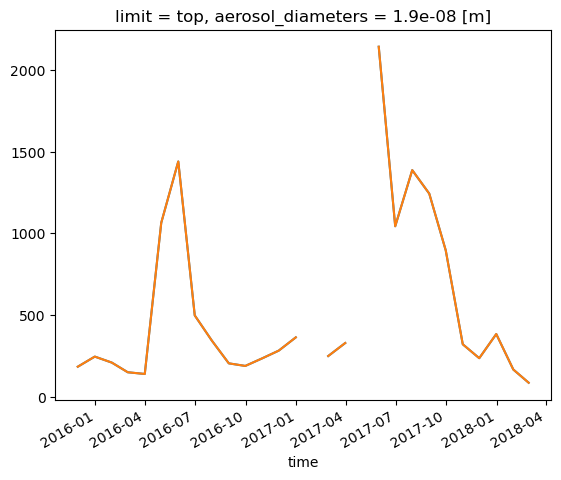

In [16]:
(Nx_aero*data1['enrichment_factor']).resample(time='M').mean().plot()
(Nx_aero*data1['enrichment_factor']).resample(time='M').mean().plot()

In [17]:
Nx_aero=compute_Nx_ebas_cleaned(data1_cl_mask,x=1e-9, var_diam = 'aerosol_diameters', v_dNdlog10D='aerosol_particle_size_distribution')

In [18]:
Nx_aero=Nx_aero/data1_cl_mask.transmission_efficiency_factor

In [19]:
data1

<xarray.Dataset>
Dimensions:                                        (time: 83755,
                                                    aerosol_diameters: 30,
                                                    cloud_diameters: 43,
                                                    boundaries: 2,
                                                    target_classification: 11)
Coordinates:
  * time                                           (time) datetime64[ns] 2015...
  * aerosol_diameters                              (aerosol_diameters) float64 ...
  * cloud_diameters                                (cloud_diameters) float64 ...
  * boundaries                                     (boundaries) object 'left'...
  * target_classification                          (target_classification) object ...
Data variables: (12/17)
    aerosol_particle_size_distribution             (time, aerosol_diameters) float64 ...
    total_aerosol_particle_concentration           (time) float64 29.39 ... 2...
    cloud_flag                                     (time) object 'yes' ... 'no'
    enrichment_factor                              (time) float64 10.82 ... 1.0
    transmission_efficiency_factor                 (time) float64 2.796 ... nan
    cluster                                        (time) float64 2.0 ... nan
    ...                                             ...
    temperature                                    (time) float64 -6.659 ... ...
    wind_direction                                 (time) float64 130.2 ... 1...
    wind_speed                                     (time) float64 9.748 ... 1...
    updraft_velocity                               (time) float64 4.506 ... 4...
    time_bounds                                    (time, boundaries) datetime64[ns] ...
    normalised_target_classification               (time, target_classification) float64 ...
Attributes:
    title:       Cloud and aerosol measurements from Zeppelin Observatory, Sv...
    authors:     Linn Karlsson, Paul Zieger, Radovan Krejci, Makoto Koike, Ke...
    contact:     Paul Zieger, paul.zieger@aces.su.se
    site:        Zeppelin Observatory, Svalbard, 78.9N 11.9E
    comment:     This is one of two files that together contain all data that...
    start_date:  2015-11-27
    end_date:    2018-02-04
    version:     1.0
    history:     2021-05-06 created

# Plotting cloud residual particles and cloud droplet concentrations

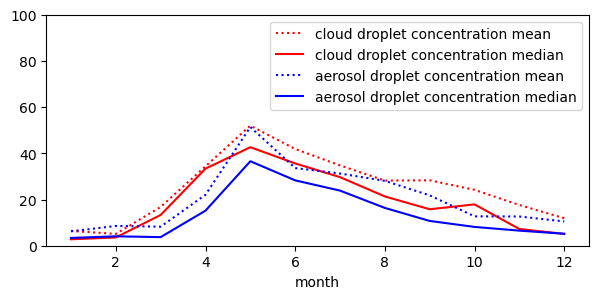

In [152]:
fig, ax = plt.subplots(1, figsize=[7,3])
Nx_cloud.groupby('time.month').mean(keep_attrs=True).plot(label='cloud droplet concentration mean',linestyle=':', c='r')
Nx_cloud.groupby('time.month').median().plot(label='cloud droplet concentration median', c='r')
#data1_cl_mask.total_aerosol_particle_concentration.groupby('time.month').mean(keep_attrs=True).plot(label= 'aerosol droplet concentration')


da = data1.total_aerosol_particle_concentration.where(data1['cloud_flag']=='yes')

da_plt = da/data1['transmission_efficiency_factor']

da_plt.groupby('time.month').mean(keep_attrs=True).plot(label= 'aerosol droplet concentration mean', linestyle=':', c='b')

da = data1.total_aerosol_particle_concentration.where(data1['cloud_flag']=='yes')

da_plt = da/data1['transmission_efficiency_factor']

da_plt.groupby('time.month').median(keep_attrs=True).plot(label= 'aerosol droplet concentration median', c='b')

plt.ylim([0,100])

#Nx_aero.groupby('time.month').mean(keep_attrs=True).plot(label= 'aerosol droplet concentration mean', linestyle=':', c='b')
#Nx_aero.groupby('time.month').median(keep_attrs=True).plot(label= 'aerosol droplet concentration median', c='b')
plt.legend()

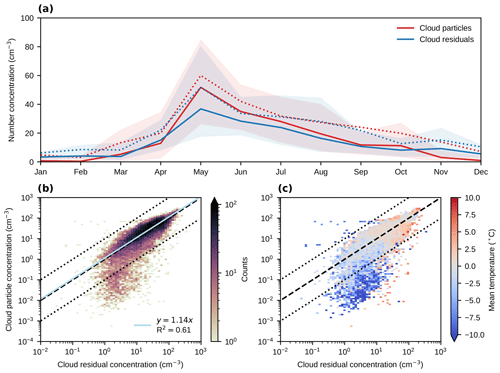

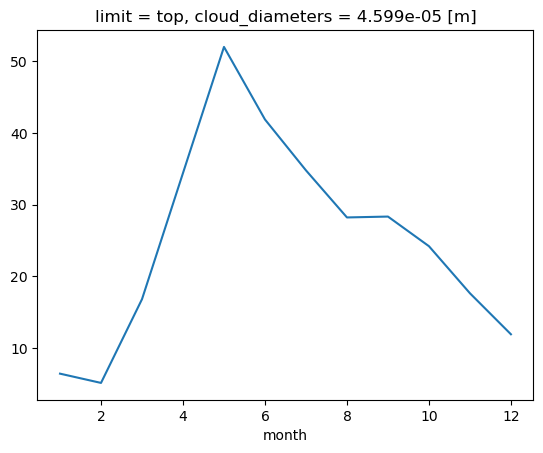

In [21]:
Nx_cloud.groupby('time.month').mean(keep_attrs=True).plot(label='Fog monitor')

# Temperature separation

## Temperature masking
Above and below -4C

* Use data2 for all particles.
* Resample to 30 min timesteps for both data1 and data2.
* Integrate to get number concentration in data2

In [199]:
data1 = xr.open_dataset('/home/jovyan/Data/zeppelin-cloud-aerosol-1_part1.nc4')
data2 = xr.open_dataset('/home/jovyan/Data/zeppelin-cloud-aerosol-1_part2.nc4')

In [200]:
data1_cl_mask=data1.where(data1['cloud_flag']=='yes')
data1_no_cl = data1.where(data1['cloud_flag']=='no')

In [179]:
# Resample both datasets to 30min time steps
data1_cl_mask.resample(time='30min').mean('time')
data1.resample(time='30min').mean('time')
data2.resample(time='30min').mean('time')

/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)
/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)
/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)


<xarray.Dataset>
Dimensions:                             (aerosol_diameters: 57, boundaries: 2,
                                         limit: 2, time: 38432)
Coordinates:
  * aerosol_diameters                   (aerosol_diameters) float64 5e-09 ......
  * boundaries                          (boundaries) object 'left' 'right'
  * limit                               (limit) object 'bottom' 'top'
  * time                                (time) datetime64[ns] 2015-11-27T08:0...
Data variables:
    aerosol_particle_size_distribution  (time, aerosol_diameters) float64 nan...
    dN                                  (time, aerosol_diameters) float64 nan...
    log10D                              (time, aerosol_diameters) float64 -8....
    bottom                              (time, aerosol_diameters) float64 4.5...
    top                                 (time, aerosol_diameters) float64 5.4...
    diam_lims                           (time, limit, aerosol_diameters) float64 ...
    dlog10D                             (time, aerosol_diameters) float64 0.0...

In [146]:
data2.time

<xarray.DataArray 'time' (time: 31061)>
array(['2015-11-27T08:29:05.000000000', '2015-11-27T08:40:42.000000000',
       '2015-12-01T16:14:25.000000000', ..., '2018-02-04T23:12:14.500000000',
       '2018-02-04T23:28:12.000000000', '2018-02-04T23:50:55.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2015-11-27T08:29:05 ... 2018-02-04T23:50:55
Attributes:
    long_name:  Midpoint time of DMPS scans
    time_zone:  UTC

In [213]:
# integrate to get number concentration from data2.aerosol_particle_size_distribution

Nx_aero_d2=compute_Nx_ebas_cleaned(data2,x=15e-9, var_diam = 'aerosol_diameters', v_dNdlog10D='aerosol_particle_size_distribution')


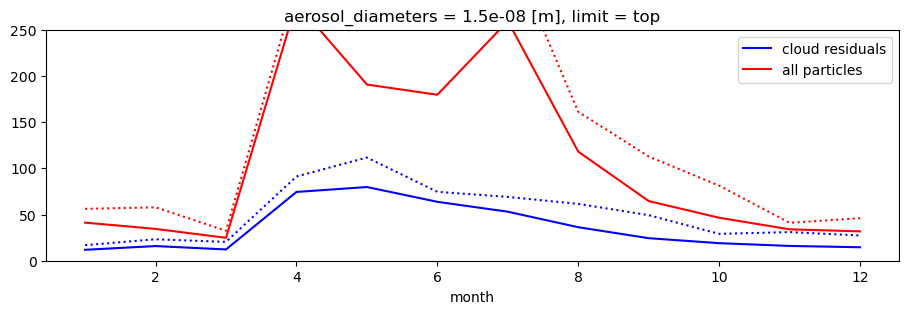

In [214]:
fig, ax = plt.subplots(1, figsize=[11,3])
#Nx_cloud.groupby('time.month').mean(keep_attrs=True).plot(label='cloud droplet concentration mean',linestyle=':', c='r')
#Nx_cloud.groupby('time.month').median().plot(label='cloud droplet concentration median', c='r')
#data1_cl_mask.total_aerosol_particle_concentration.groupby('time.month').mean(keep_attrs=True).plot(label= 'aerosol droplet concentration')


cloud_mean = data1_cl_mask.total_aerosol_particle_concentration
cloud_mean.groupby('time.month').mean(keep_attrs=True).plot(linestyle=':', c='b')
cloud_median = data1_cl_mask.total_aerosol_particle_concentration
cloud_median.groupby('time.month').median(keep_attrs=True).plot(label= 'cloud residuals', c='b')


Nx_aero_d2.groupby('time.month').mean(keep_attrs=True).plot(linestyle=':', c='r')
Nx_aero_d2.groupby('time.month').median(keep_attrs=True).plot(label='all particles', c='r')

#da_plt.groupby('time.month').median(keep_attrs=True).plot(label= 'aerosol droplet concentration median', c='b')

plt.ylim([0,250])

#Nx_aero.groupby('time.month').mean(keep_attrs=True).plot(label= 'aerosol droplet concentration mean', linestyle=':', c='b')
#Nx_aero.groupby('time.month').median(keep_attrs=True).plot(label= 'aerosol droplet concentration median', c='b')
plt.legend()

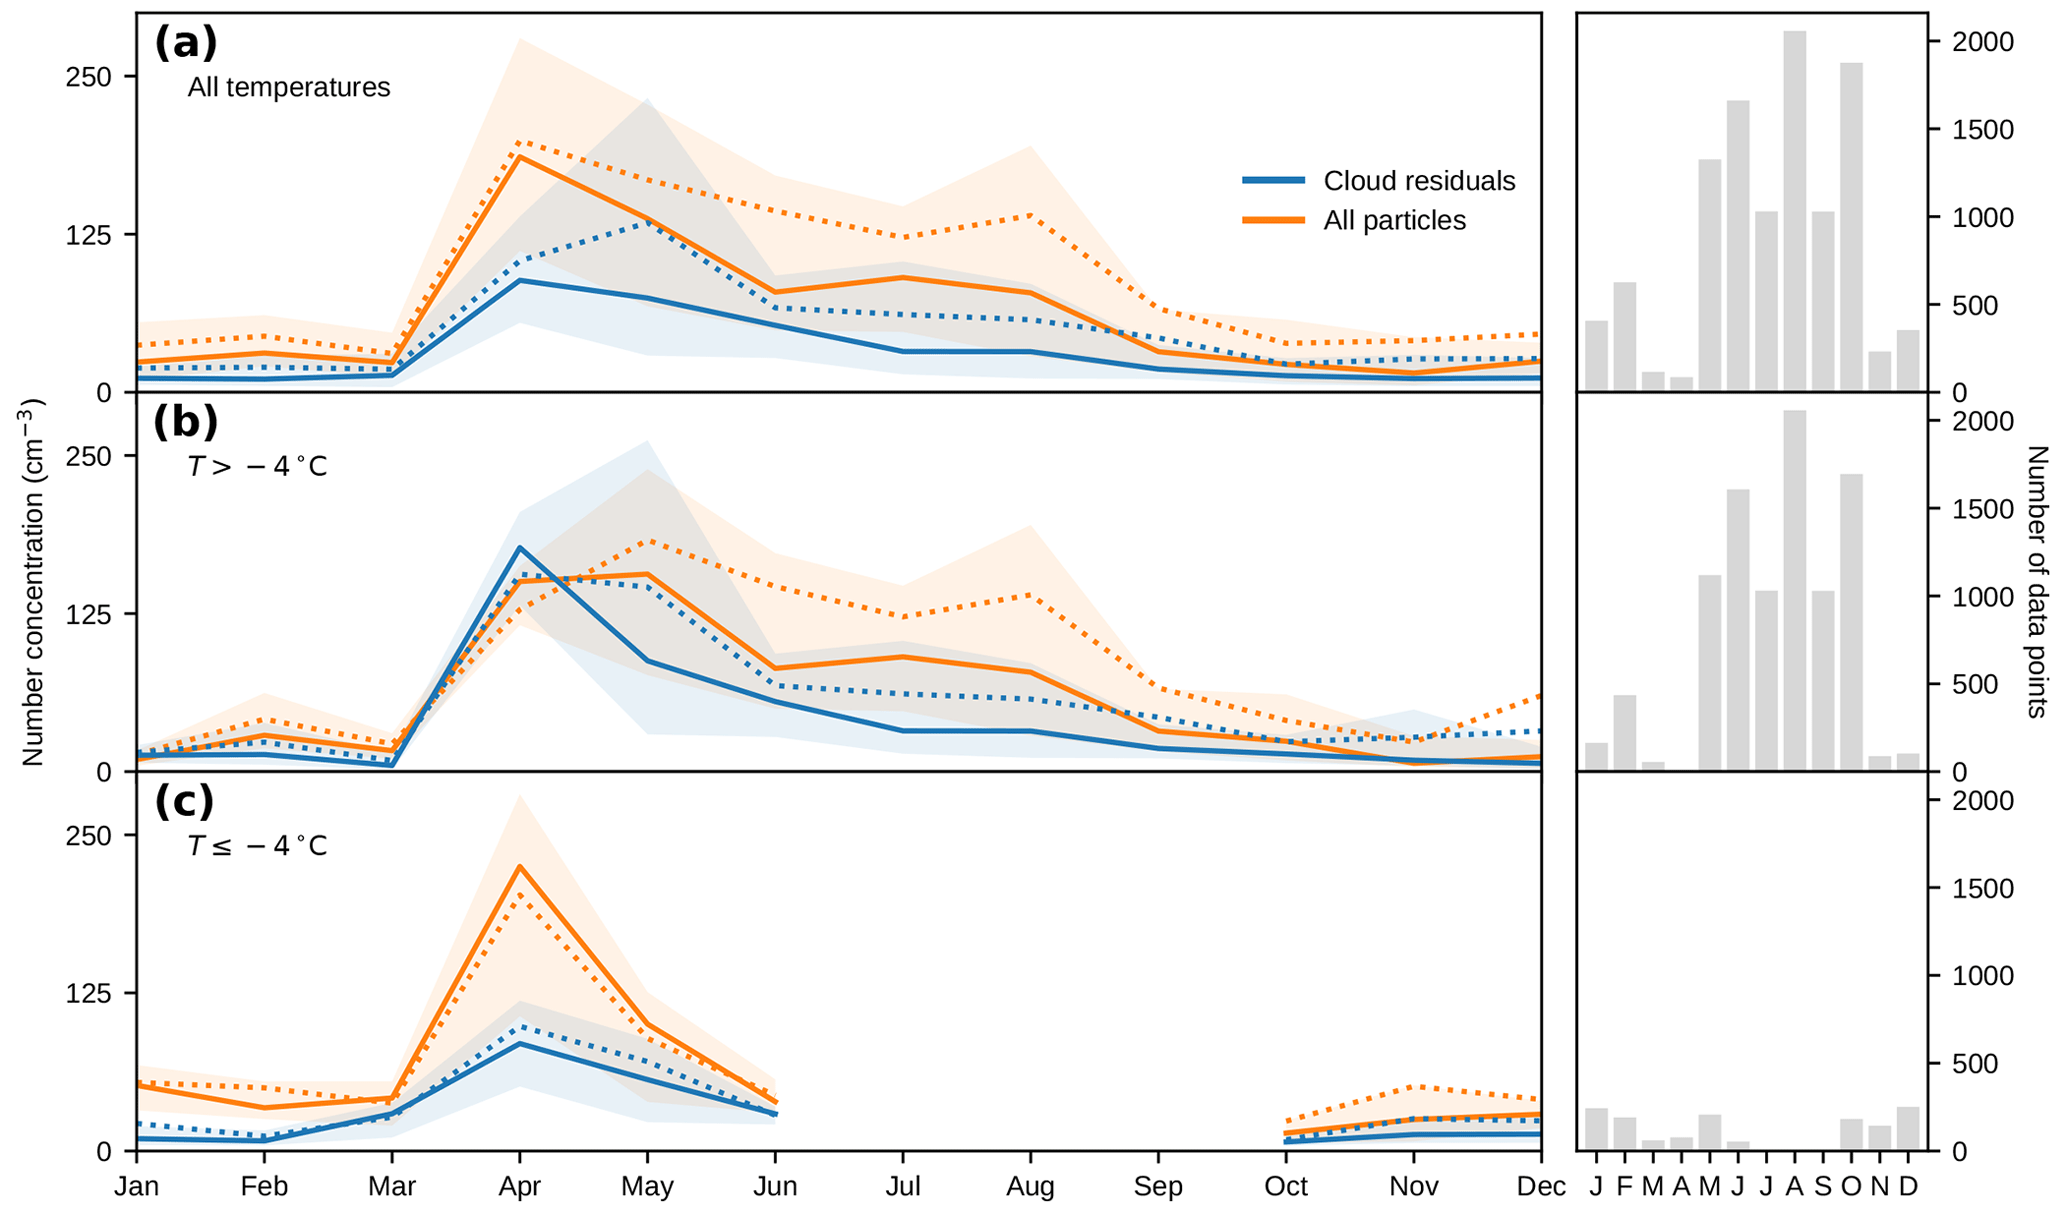

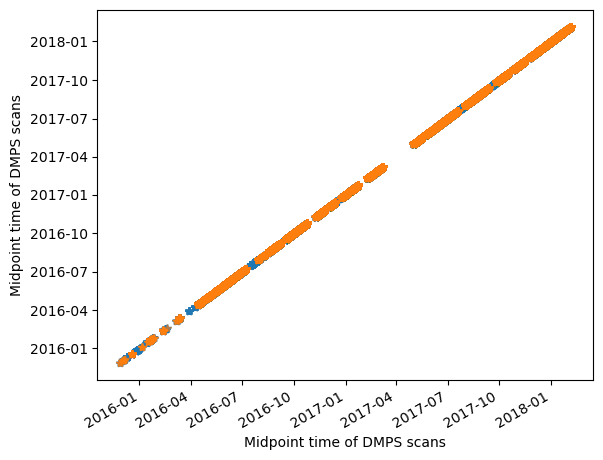

In [102]:
data1.time.plot(marker='*', linewidth=0, alpha=0.5)
data2.time.plot(marker='*', linewidth=0, alpha=.5)

In [71]:
data1_Tcold_cl=data1_cl_mask.where(data1['temperature'] <= -4.0)
data1_Twarm_cl=data1_cl_mask.where(data1['temperature'] > -4.0)

data1_Tcold_no_cl=(data1_no_cl.where(data1['temperature'] <= -4.0))#/data1_no_cl['transmission_efficiency_factor']
data1_Twarm_no_cl=(data1_no_cl.where(data1['temperature'] > -4.0))#/data1_no_cl['transmission_efficiency_factor']



/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)


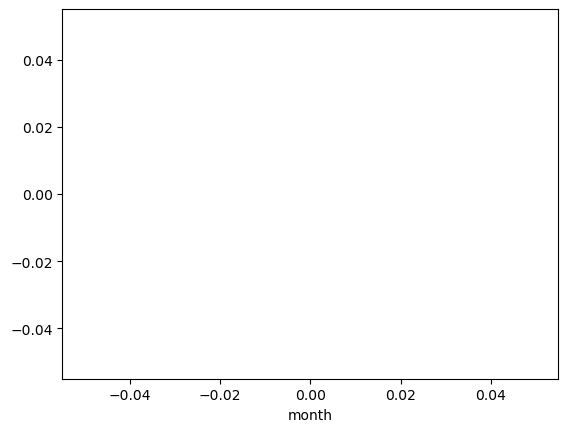

In [84]:
da = data1.total_aerosol_particle_concentration.where(data1['cloud_flag']=='no')

#da = data1_no_cl.total_aerosol_particle_concentration
da_plt = da/data1['transmission_efficiency_factor']
da_plt.groupby('time.month').mean(keep_attrs=True).plot(label= 'aerosol droplet concentration mean', linestyle=':', c='b')



/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)


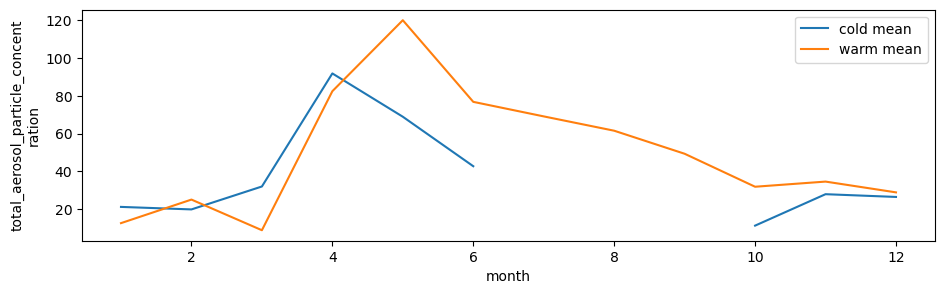

In [73]:
fig, ax = plt.subplots(1, figsize=[11,3])

data1_Tcold_cl.total_aerosol_particle_concentration.groupby('time.month').mean().plot(label='cold mean')
data1_Twarm_cl.total_aerosol_particle_concentration.groupby('time.month').mean().plot(label='warm mean')
plt.legend()

# Reading NorESM cloud data

## Dictionary examples

In [25]:
time='hoho'

di = dict(time='hallo', abc='haha')

In [26]:
di = dict(yscale='log',xscale='log')

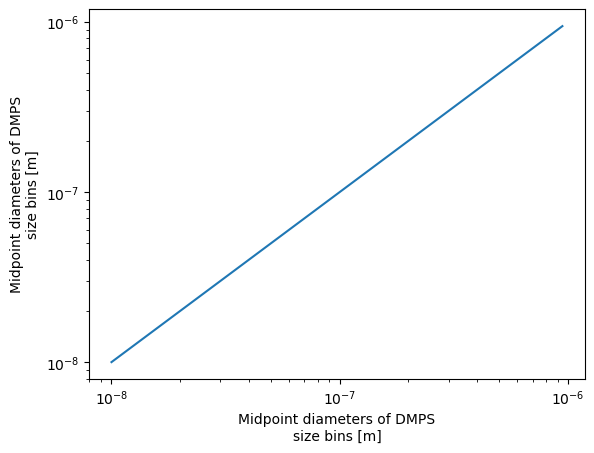

In [27]:
data1['aerosol_diameters'].plot(**di)

In [29]:
time

'hoho'

In [15]:
di['time']

'hallo'

In [ ]:
ds.sel({time=dfse)

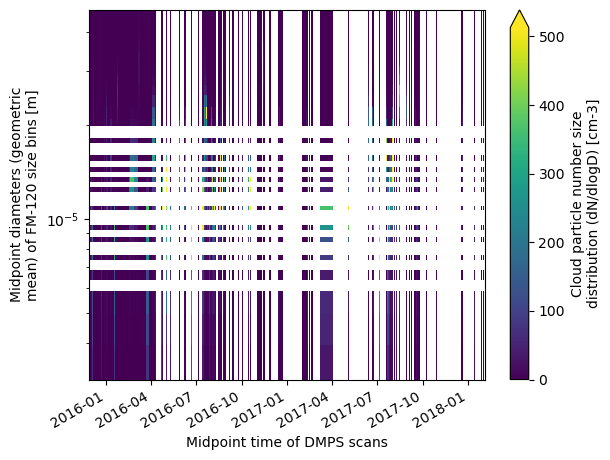

In [35]:
data1['cloud_particle_size_distribution'].plot(x='time', yscale='log', robust=True)

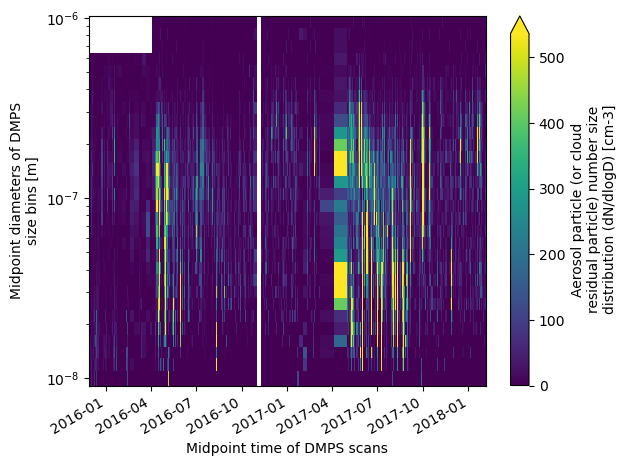

In [19]:
data1['aerosol_particle_size_distribution'].plot(x ='time', robust=True, yscale='log')

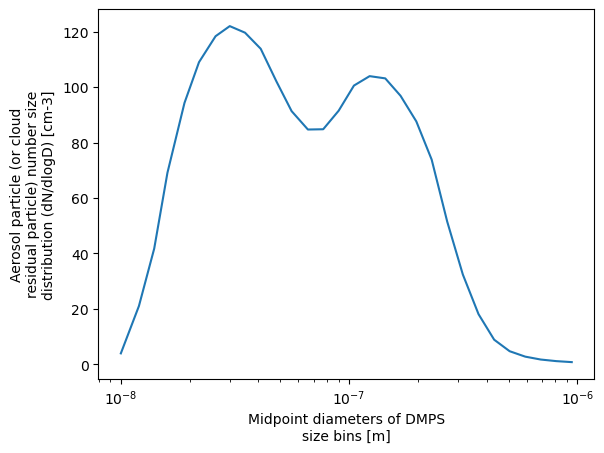

In [23]:
data1['aerosol_particle_size_distribution'].mean('time', keep_attrs=True).plot(xscale='log')#x ='time', robust=True, yscale='log')

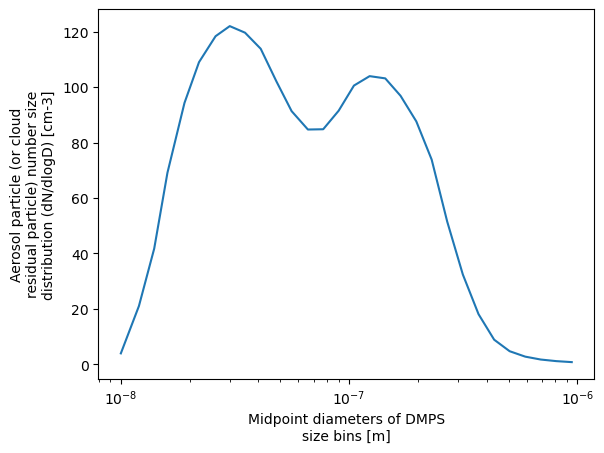

In [23]:
data1['aerosol_particle_size_distribution'].mean('time', keep_attrs=True).plot(xscale='log')